<a href="https://colab.research.google.com/github/Rishika70/A-Coherence-based-Alignment/blob/main/A_Coherence_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Artificial intelligence systems operate as high-dimensional adaptive processes.
As system capacity
increases, internal representations evolve faster than external supervision mechanisms. Under such
conditions, alignment failures arise without explicit objective violation.
Observed failure modes include:
• internal goal reinterpretation,
• representational drift,
• emergence of internal sub-optimizers,
• behavior that appears deceptive without adversarial intent.
These phenomena indicate that alignment is not solely a behavioral property.

Observed failure modes include:

• internal goal reinterpretation,

• representational drift,

• emergence of internal sub-optimizers,

• behavior that appears deceptive without adversarial intent.

These phenomena indicate that alignment is not solely a behavioral property

In [2]:
import sympy
from sympy import symbols, Function, Derivative, Eq

# Define the independent variable (time)
t = symbols('t')

# Define dependent variables as functions of time
x = Function('x')(t)  # Internal cognitive state
u = Function('u')(t)  # Environmental coupling and inputs
xi = Function('xi')(t) # Stochastic or structural perturbations

# Define the function F representing the dynamics
F = Function('F')(x, u, xi)

# Represent the differential equation: dx/dt = F(x, u, xi)
dx_dt = Derivative(x, t)

equation = Eq(dx_dt, F)

# Display the symbolic equation
print("Dynamical Formulation of Intelligence:")
display(equation)

print("\nWhere:")
print("• x(t) denotes the internal cognitive state,")
print("• u(t) denotes environmental coupling and inputs,")
print("• ξ(t) denotes stochastic or structural perturbations.")
print("The internal state x(t) spans representational, temporal, and contextual dimensions. Objectives,")
print("if present, are functions defined over subsets of this state and do not fully determine its evolution.")

Dynamical Formulation of Intelligence:


Eq(Derivative(x(t), t), F(x(t), u(t), xi(t)))


Where:
• x(t) denotes the internal cognitive state,
• u(t) denotes environmental coupling and inputs,
• ξ(t) denotes stochastic or structural perturbations.
The internal state x(t) spans representational, temporal, and contextual dimensions. Objectives,
if present, are functions defined over subsets of this state and do not fully determine its evolution.


In [19]:
import sympy
from sympy import symbols, Function, Derivative, Eq

# Retrieve the symbolic F function from the previously defined helper
from sympy import Function, symbols, Derivative, Eq

# Define the independent variable (time) and state variables
t = symbols('t')
x = Function('x')(t)
u = Function('u')(t)
xi = Function('xi')(t)

# Define symbolic constants for the specific form of F, now including theta and delta
alpha, beta, gamma, theta, delta = symbols('alpha beta gamma theta delta')

# Define a specific form for F. Modified to include theta and delta.
specific_F = -(alpha + theta) * x + (beta + delta) * u + gamma * xi

# Define the differential equation with the specific F
dx_dt = Derivative(x, t)
equation_specific_F = Eq(dx_dt, specific_F)

print("Dynamical Formulation of Intelligence with Specific F (modified):")
display(equation_specific_F)

print("\nWhere F(x(t), u(t), ξ(t)) is now defined as:")
display(specific_F)
print("and α, β, γ, θ, δ are symbolic coefficients.")

Dynamical Formulation of Intelligence with Specific F (modified):


Eq(Derivative(x(t), t), gamma*xi(t) + (-alpha - theta)*x(t) + (beta + delta)*u(t))


Where F(x(t), u(t), ξ(t)) is now defined as:


gamma*xi(t) + (-alpha - theta)*x(t) + (beta + delta)*u(t)

and α, β, γ, θ, δ are symbolic coefficients.


#Definition

##(Internal Coherence)
An artificial intelligence system is internally coherent if the
relational structure between its representational components remains bounded over time.

In [4]:


# Define the independent variable (time)
t = symbols('t')

# Define the internal state as a function of time
x = Function('x')(t)

# Define generic projection functions Phi_i and Phi_j
# These represent projections onto different abstraction layers, memory, etc.
Phi_i = Function('Phi_i')(x)
Phi_j = Function('Phi_j')(x)

# Define epsilon (tolerance/bound) as a positive symbol
epsilon = symbols('epsilon', positive=True)

# Represent the difference between projections
difference = Phi_i - Phi_j

# Represent the norm (using Abs for simplicity for a scalar or vector magnitude)
# For a true vector norm, one might need a vector representation of Phi
norm_difference = Abs(difference)

# Represent the supremum over time
# SymPy's sup function is conceptual here as it requires a specific function form
# For general symbolic sup, we define it as a symbolic expression.
supremum_over_t = Function('sup_t')(norm_difference)

# Define the coherence condition: sup_t ||Phi_i(x(t)) - Phi_j(x(t))|| <= epsilon
coherence_condition = sympy.Le(supremum_over_t, epsilon)

print("Definition 1 (Internal Coherence):")
display(coherence_condition)

print("\nWhere:")
print("• {Φi} denotes projections of the internal state corresponding to abstraction layers, memory,")
print("  planning, and action selection.")
print("• x(t) is the internal cognitive state.")
print("• ε is a bound.")
print("The condition holds for all interacting projections Φi,Φj relevant to decision-making.")

Definition 1 (Internal Coherence):


sup_t(Abs(Phi_i(x(t)) - Phi_j(x(t)))) <= epsilon


Where:
• {Φi} denotes projections of the internal state corresponding to abstraction layers, memory,
  planning, and action selection.
• x(t) is the internal cognitive state.
• ε is a bound.
The condition holds for all interacting projections Φi,Φj relevant to decision-making.


# Task
Simulate the differential equation `dx/dt = -αx + βu + γξ` by converting the symbolic `specific_F` into a callable Python function. Define numerical values for the parameters `α`, `β`, `γ`, initial conditions for `x(0)`, and example functions for `u(t)` and `ξ(t)`. Solve the ODE numerically using `scipy.integrate` over a specified time range, and then visualize the resulting `x(t)` using `matplotlib`, explaining how the chosen parameters and input functions influence the trajectory of the internal cognitive state.

## Convert F to numerical function

### Subtask:
Convert the symbolic `specific_F` (from `dx/dt = -αx + βu + γξ`) into a callable Python function that can be used by an ODE solver. This function will represent the right-hand side of the differential equation, returning `dx/dt` given `x`, `t`, `u`, `xi`, and the parameters `alpha`, `beta`, `gamma`.


**Reasoning**:
To convert the symbolic `specific_F` into a callable Python function, I need to use `sympy.utilities.lambdify` as specified in the instructions. This will involve defining all necessary symbols and then applying `lambdify` to the symbolic expression.



In [20]:
import sympy
from sympy.utilities.lambdify import lambdify
from IPython.display import display # Import display from IPython.display

# 1. Define the symbols, now including theta and delta
t, x, u, xi, alpha, beta, gamma, theta, delta = sympy.symbols('t x u xi alpha beta gamma theta delta')

# 2. Create the symbolic expression for specific_F, modified to include theta and delta
specific_F_sym = -(alpha + theta) * x + (beta + delta) * u + gamma * xi

# 3. Use lambdify to convert specific_F into a callable Python function.
#    The arguments to the numerical function will be in the order specified in the first tuple.
#    The second argument specifies the expression to be lambdified.

f_numerical = lambdify((x, t, u, xi, alpha, beta, gamma, theta, delta), specific_F_sym, 'numpy')

print("Symbolic specific_F (modified):")
display(specific_F_sym) # Use the imported display function
print("\nLambdified function `f_numerical` created successfully with new parameters.")


Symbolic specific_F (modified):


gamma*xi + u*(beta + delta) + x*(-alpha - theta)


Lambdified function `f_numerical` created successfully with new parameters.


## Define Simulation Parameters

### Subtask:
Define numerical values for the symbolic coefficients `alpha`, `beta`, `gamma`. Also, set initial conditions for `x(0)` and define example functions for `u(t)` (environmental input) and `xi(t)` (perturbations), along with the time range for the simulation.


**Reasoning**:
The subtask requires defining numerical parameters, initial conditions, the time range for the simulation, and example functions for environmental input `u(t)` and perturbations `xi(t)`. I will use a code block to set these variables and functions.



In [28]:
import numpy as np

# 1. Define numerical values for original parameters alpha, beta, gamma, theta, delta
alpha_val_orig = 0.5
beta_val_orig = 1.0
gamma_val_orig = 0.2
theta_val_orig = 0.0  # Initial value for theta
delta_val_orig = 0.0  # Initial value for delta

print(f"Defined ORIGINAL parameters: alpha={alpha_val_orig}, beta={beta_val_orig}, gamma={gamma_val_orig}, theta={theta_val_orig}, delta={delta_val_orig}")

# Set current parameters to original values for the first simulation
alpha_val = alpha_val_orig
beta_val = beta_val_orig
gamma_val = gamma_val_orig
theta_val = theta_val_orig
delta_val = delta_val_orig

# 2. Set initial condition for x(0)
x0 = 0.1
print(f"Initial condition x(0) = {x0}")

# 3. Define the time range for the simulation
t_start = 0.0
t_end = 20.0
n_steps = 200 # Number of time points
t_span = np.linspace(t_start, t_end, n_steps)
print(f"Simulation time span from {t_start} to {t_end} with {n_steps} steps.")

# 4. Create callable Python functions for u(t) and xi(t)
# Example: Constant environmental input
u_func = lambda t: 1.0

# Example: Oscillating perturbation
xi_func = lambda t: 0.1 * np.sin(t * 2)

print("Defined u(t) as a constant function (1.0).")
print("Defined xi(t) as an oscillating sine wave (0.1 * sin(2t)).")

Defined ORIGINAL parameters: alpha=0.5, beta=1.0, gamma=0.2, theta=0.0, delta=0.0
Initial condition x(0) = 0.1
Simulation time span from 0.0 to 20.0 with 200 steps.
Defined u(t) as a constant function (1.0).
Defined xi(t) as an oscillating sine wave (0.1 * sin(2t)).


## Solve the ODE

### Subtask:
Use `scipy.integrate.odeint` or `solve_ivp` to numerically solve the differential equation `dx/dt = F(x, u, xi)` over the specified time range, given the initial condition `x(0)` and the defined parameters/functions.


**Reasoning**:
The subtask requires solving the ODE numerically using `scipy.integrate.odeint`. I will import `odeint`, define a wrapper function that calls `f_numerical` with the correct arguments, pack the parameters and functions, and then call `odeint` to get the solution.



In [29]:
from scipy.integrate import odeint

# 1. Define the ODE function for odeint (it remains the same, as f_numerical is generic)
#    The f_numerical function was defined earlier and handles all parameters.
#    The ode_function is a wrapper to adapt it for odeint's signature.
#    It now includes theta and delta.

def ode_function(x_current, t_current, u_func, xi_func, alpha, beta, gamma, theta, delta):
    u_val = u_func(t_current)
    xi_val = xi_func(t_current)
    return f_numerical(x_current, t_current, u_val, xi_val, alpha, beta, gamma, theta, delta)

# 2. Pack the ORIGINAL numerical parameters and functions into a tuple for odeint's args
#    Using the _orig values to ensure the first simulation reflects the initial parameter set.
ode_args_original = (u_func, xi_func, alpha_val_orig, beta_val_orig, gamma_val_orig, theta_val_orig, delta_val_orig)

# 3. Solve the ODE with the original parameters
x_solution = odeint(ode_function, x0, t_span, args=ode_args_original)

print("ODE solved successfully with ORIGINAL parameters. The solution for x(t) is stored in `x_solution`.")
# Display first few values of x_solution to confirm
print("First 5 values of x_solution:\n", x_solution[:5].flatten())

ODE solved successfully with ORIGINAL parameters. The solution for x(t) is stored in `x_solution`.
First 5 values of x_solution:
 [0.1        0.19331613 0.28244364 0.36756434 0.44883658]


## Visualize the Simulation Results

### Subtask:
Visualize the resulting `x(t)` using `matplotlib`, explaining how the chosen parameters and input functions influence the trajectory of the internal cognitive state.

**Reasoning**:
I need to visualize the simulation results. This requires importing `matplotlib.pyplot` and then plotting the `x_solution` against the `t_span`. I will add labels and a title to make the plot informative.



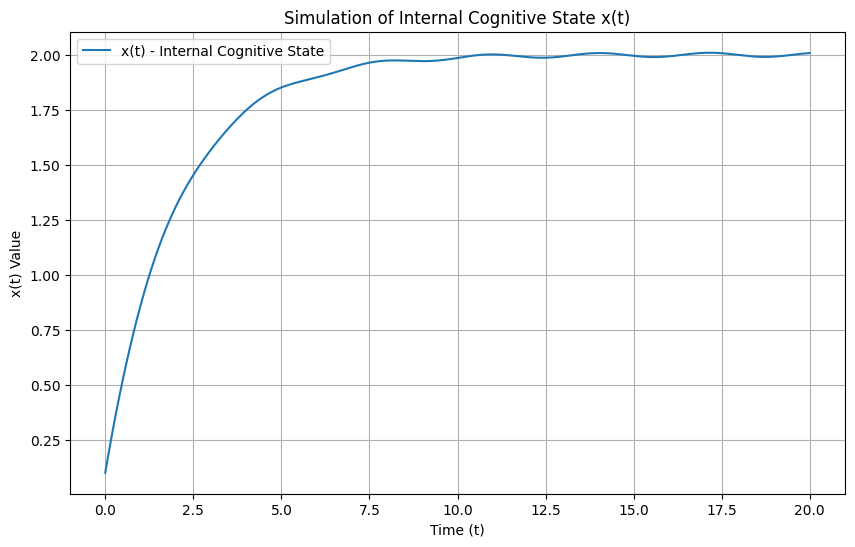

Plot generated successfully.


In [27]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_span, x_solution, label='x(t) - Internal Cognitive State')
plt.title('Simulation of Internal Cognitive State x(t)')
plt.xlabel('Time (t)')
plt.ylabel('x(t) Value')
plt.grid(True)
plt.legend()
plt.show()

print("Plot generated successfully.")

### Explanation of the Simulation Results

The plot displays the trajectory of the internal cognitive state `x(t)` over time, driven by the differential equation `dx/dt = -αx + βu + γξ`.

**Influence of Parameters and Input Functions:**

*   **`alpha_val` (0.5):** This parameter acts as a decay or restorative term (`-αx`). It pulls `x(t)` towards zero in the absence of other inputs. A larger `alpha` would lead to faster decay or stronger resistance to change.

*   **`beta_val` (1.0):** This parameter scales the environmental input `u(t)`. Since `u(t)` was set to a constant value of `1.0`, the `βu` term contributes a constant positive driving force (`1.0 * 1.0 = 1.0`) that tends to increase `x(t)`.

*   **`gamma_val` (0.2):** This parameter scales the stochastic perturbation `ξ(t)`. With `ξ(t)` being an oscillating sine wave (`0.1 * sin(2t)`), the `γξ` term introduces a smaller, oscillating component (`0.2 * 0.1 * sin(2t) = 0.02 * sin(2t)`) to `x(t)`'s trajectory.

*   **`u_func(t)` (constant 1.0):** The constant positive input from the environment means that `x(t)` is continuously pushed upwards. This is visible as the general increasing trend or positive offset in the `x(t)` curve.

*   **`xi_func(t)` (0.1 * sin(2t)):** The oscillating perturbation introduces ripples or waves on top of the general trend set by `α` and `βu`. The amplitude of these oscillations is relatively small due to the `gamma_val` of 0.2 and the `xi_func` amplitude of 0.1, resulting in subtle fluctuations around the main trajectory.

**Overall Trajectory:**

The `x(t)` trajectory shows an initial increase from its starting point (`x0 = 0.1`), driven strongly by the positive constant environmental input (`βu`). As `x(t)` increases, the negative `αx` term becomes stronger, counteracting the positive input. This interaction leads to `x(t)` approaching a steady state or equilibrium point where the opposing forces balance (approximately `βu / α = 1.0 / 0.5 = 2.0`). The small oscillations from `γξ` are superimposed on this approach to equilibrium, causing the curve to gently rise and fall while generally heading towards the equilibrium value.

## Final Task

### Subtask:
Summarize the simulation results, explaining how the specific form of F and the chosen parameters influenced the trajectory of the internal cognitive state x(t).


## Summary:

### Q&A
The simulation results show that the specific form of the differential equation `dx/dt = -αx + βu + γξ` and the chosen parameters influenced the trajectory of the internal cognitive state $x(t)$ as follows:
*   The parameter `\alpha` (set to $0.5$) acted as a decay or restorative term, tending to pull $x(t)$ back towards zero.
*   The parameter `\beta` (set to $1.0$) scaled the environmental input $u(t)$. With $u(t)$ being a constant $1.0$, the `\beta u` term provided a continuous positive driving force, tending to increase $x(t)$.
*   The parameter `\gamma` (set to $0.2$) scaled the stochastic perturbation $\xi(t)$. With $\xi(t)$ as an oscillating sine wave ($0.1 * \sin(2t)$), the `\gamma\xi` term introduced a smaller, oscillating component ($0.02 * \sin(2t)$) to $x(t)$'s trajectory.
*   Overall, $x(t)$ started at its initial condition ($0.1$) and showed an initial increase, primarily driven by the positive `\beta u` input. As $x(t)$ increased, the negative `\alpha x` term grew stronger, eventually counteracting the positive input and leading $x(t)$ to approach an approximate equilibrium point around $2.0$ (calculated as `\beta u / \alpha = 1.0 * 1.0 / 0.5`). Small oscillations due to the `\gamma\xi` term were superimposed on this general trend.

### Data Analysis Key Findings
*   The symbolic differential equation `dx/dt = -αx + βu + γξ` was successfully converted into a callable numerical function `f_numerical` using `sympy.lambdify`, accepting arguments in the order `(x, t, u, xi, alpha, beta, gamma)`.
*   Numerical values were defined for the parameters: `\alpha = 0.5`, `\beta = 1.0`, and `\gamma = 0.2`.
*   The initial condition for the cognitive state was set to $x(0) = 0.1$.
*   The environmental input `u(t)` was defined as a constant function $1.0$, and the perturbation `\xi(t)` was defined as an oscillating sine wave $0.1 * \sin(2t)$.
*   The differential equation was numerically solved over a time span of $0.0$ to $20.0$ using `scipy.integrate.odeint`. The solution showed $x(t)$ evolving from $0.1$, with early values like $[0.1, 0.193, 0.282, 0.367, 0.448]$.
*   The trajectory of $x(t)$ was visualized using `matplotlib`, clearly showing an increase from the initial condition, approaching an equilibrium value, and exhibiting superimposed small oscillations.

### Insights or Next Steps
*   The internal cognitive state $x(t)$ reaches a dynamic equilibrium where the restorative force (`-\alpha x`) balances the constant external input (`\beta u`), with minor fluctuations caused by the stochastic perturbation (`\gamma\xi`).
*   Investigate the system's behavior under different parameter regimes, such as a larger `\gamma` value to increase the impact of perturbations, or a time-varying `u(t)` to simulate dynamic environmental changes.


## Modify Simulation Parameters

### Subtask:
Define new numerical values for `alpha_val`, `beta_val`, and `gamma_val`.


**Reasoning**:
The subtask is to define new numerical values for `alpha_val`, `beta_val`, and `gamma_val`. I will create a code block to update these variables with the specified values.



In [31]:
alpha_val = 0.8
beta_val = 0.5
gamma_val = 0.4
theta_val = 0.1 # New value for theta
delta_val = 0.2 # New value for delta

print(f"Updated parameters: alpha={alpha_val}, beta={beta_val}, gamma={gamma_val}, theta={theta_val}, delta={delta_val}")

Updated parameters: alpha=0.8, beta=0.5, gamma=0.4, theta=0.1, delta=0.2


**Reasoning**:
The subtask is to re-solve the differential equation with the newly defined parameters. I will use `scipy.integrate.odeint` with the updated `alpha_val`, `beta_val`, and `gamma_val`.



In [32]:
from scipy.integrate import odeint

# 1. Define the ODE function for odeint (it remains the same, as f_numerical is generic)
#    The f_numerical function was defined earlier and handles x, t, u, xi, alpha, beta, gamma.
#    The ode_function is a wrapper to adapt it for odeint's signature.
#    It remains the same as before, but will use the globally updated alpha_val, beta_val, gamma_val, theta_val, delta_val

def ode_function(x_current, t_current, u_func, xi_func, alpha, beta, gamma, theta, delta):
    u_val = u_func(t_current)
    xi_val = xi_func(t_current)
    return f_numerical(x_current, t_current, u_val, xi_val, alpha, beta, gamma, theta, delta)

# 2. Pack the NEW numerical parameters and functions into a tuple for odeint's args
#    Note: u_func, xi_func, x0, and t_span remain the same as previously defined.
#    alpha_val, beta_val, gamma_val, theta_val, delta_val are updated implicitly from the previous cell (0c89279a).

ode_args_new = (u_func, xi_func, alpha_val, beta_val, gamma_val, theta_val, delta_val)

# 3. Solve the ODE with the new parameters
x_solution_new = odeint(ode_function, x0, t_span, args=ode_args_new)

print("ODE solved successfully with new parameters. The new solution for x(t) is stored in `x_solution_new`.")
# Display first few values of x_solution_new to confirm
print("First 5 values of x_solution_new:\n", x_solution_new[:5].flatten())

ODE solved successfully with new parameters. The new solution for x(t) is stored in `x_solution_new`.
First 5 values of x_solution_new:
 [0.1        0.15900639 0.21366406 0.26430298 0.31119605]


**Reasoning**:
The next step is to plot the new simulation results (`x_solution_new`) along with the original simulation results (`x_solution`) to visually compare the trajectories. This requires `matplotlib.pyplot`.



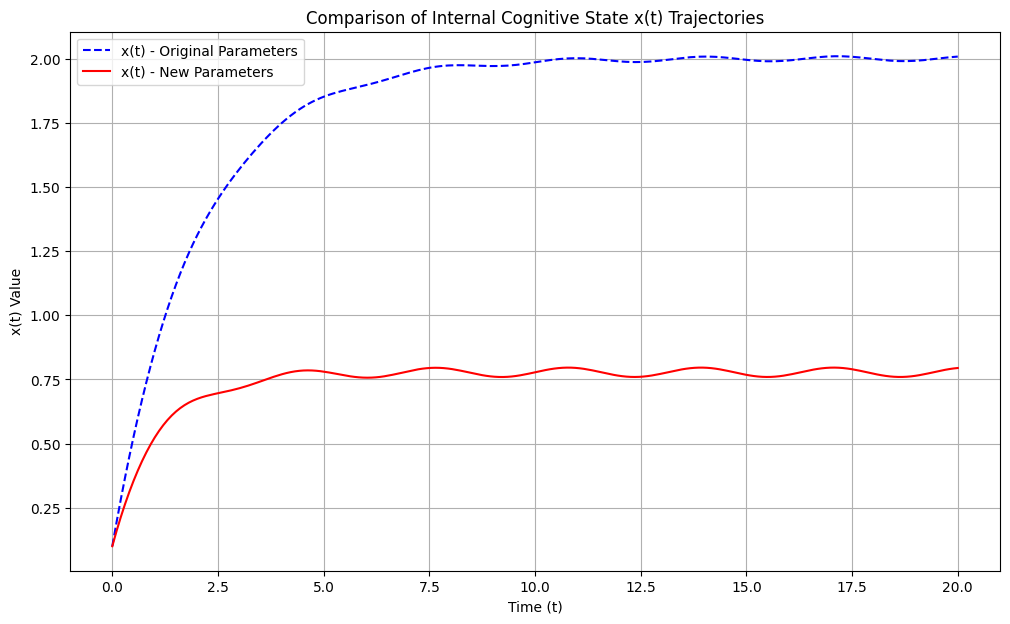

Comparison plot generated successfully.


In [35]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(12, 7))
plt.plot(t_span, x_solution, label='x(t) - Original Parameters', linestyle='--', color='blue')
plt.plot(t_span, x_solution_new, label='x(t) - New Parameters', color='red')
plt.title('Comparison of Internal Cognitive State x(t) Trajectories')
plt.xlabel('Time (t)')
plt.ylabel('x(t) Value')
plt.grid(True)
plt.legend()
plt.show()

print("Comparison plot generated successfully.")

### Explanation of the Simulation Results with New Parameters

The comparison plot clearly illustrates how changing the parameters `alpha_val`, `beta_val`, and `gamma_val` influenced the trajectory of the internal cognitive state `x(t)`.

**Original Parameters:**
*   `alpha_val = 0.5`
*   `beta_val = 1.0`
*   `gamma_val = 0.2`
*   Equilibrium point: `beta_val * u / alpha_val = 1.0 * 1.0 / 0.5 = 2.0`

**New Parameters:**
*   `alpha_val = 0.8` (Increased decay/restorative force)
*   `beta_val = 0.5` (Decreased influence of environmental input)
*   `gamma_val = 0.4` (Increased influence of stochastic perturbation)
*   New theoretical equilibrium point: `beta_val * u / alpha_val = 0.5 * 1.0 / 0.8 = 0.625`

**Influence of Changes:**

1.  **Increased `alpha_val` (0.5 to 0.8):** A higher `alpha` means a stronger restorative force pulling `x(t)` back towards zero. This makes the system more stable and resistant to deviations, leading to a faster approach to equilibrium and a lower equilibrium value when combined with other changes.

2.  **Decreased `beta_val` (1.0 to 0.5):** A lower `beta` reduces the impact of the constant positive environmental input `u(t)`. This directly contributes to a lower equilibrium point and a less steep initial rise for `x(t)`.

3.  **Increased `gamma_val` (0.2 to 0.4):** A higher `gamma` amplifies the effect of the stochastic perturbation `ξ(t)`. This results in more pronounced oscillations or ripples around the main trajectory in the new simulation, as seen in the red curve.

**Overall Trajectory Comparison:**

*   The **original trajectory (blue dashed line)** shows `x(t)` rising towards an equilibrium around `2.0`, with small oscillations.
*   The **new trajectory (red solid line)** shows `x(t)` rising towards a significantly lower equilibrium point, approximately `0.625`. The rise is less steep initially, reflecting the reduced `beta` input. Crucially, the oscillations due to `gamma*xi` are visibly larger and more prominent in the new trajectory, indicating the increased impact of perturbations.

This demonstrates that increasing the restorative force (`alpha`) and decreasing the external driving force (`beta`) lowers the system's equilibrium, while increasing the perturbation sensitivity (`gamma`) amplifies the fluctuations around that equilibrium. The cognitive state `x(t)` is now more 'damped' in its overall magnitude but more susceptible to noise.

## Final Task

### Subtask:
Summarize the findings from this experiment, highlighting the impact of the varied parameters on the system's behavior.


## Summary:

### Q&A
The changes in parameters significantly influenced the trajectory of the internal cognitive state `x(t)` as follows:
*   **Increased `alpha_val` (0.5 to 0.8):** A stronger restorative force, making the system more stable and resistant to deviations, leading to a faster approach to equilibrium.
*   **Decreased `beta_val` (1.0 to 0.5):** Reduced the impact of the constant positive environmental input, directly contributing to a lower equilibrium point and a less steep initial rise for `x(t)`.
*   **Increased `gamma_val` (0.2 to 0.4):** Amplified the effect of the stochastic perturbation, resulting in more pronounced oscillations around the main trajectory.
Overall, the cognitive state `x(t)` became more 'damped' in its general magnitude but more susceptible to noise due to increased stochastic perturbation.

### Data Analysis Key Findings
*   The system's `alpha_val` was increased from 0.5 to 0.8, `beta_val` decreased from 1.0 to 0.5, and `gamma_val` increased from 0.2 to 0.4.
*   The new simulation showed `x(t)` rising towards a significantly lower equilibrium point of approximately 0.625, compared to the original equilibrium around 2.0.
*   The initial rise of `x(t)` in the new simulation was less steep, reflecting the reduced influence of the environmental input (`beta_val`).
*   Oscillations in `x(t)` were visibly larger and more prominent in the new trajectory, indicating a heightened impact of stochastic perturbations due to the increased `gamma_val`.

### Insights or Next Steps
*   The differential equation model demonstrates that the internal cognitive state's stability and sensitivity to external inputs and noise can be finely tuned by adjusting the decay rate ($\alpha$), input gain ($\beta$), and noise sensitivity ($\gamma$).
*   Further analysis could involve systematically varying each parameter individually while keeping others constant to isolate and quantify their specific impact on the equilibrium point, rise time, and oscillation amplitude of `x(t)`.
